In [1]:
import pandas as pd
import numpy as np
from copy import deepcopy
import matplotlib.dates as mdates
import calendar

### Import datasets.

In [2]:
official_rates_raw = pd.read_csv('../in/csv/official_rates/official_rates.csv')
official_rates_raw.head(10) 

,date,buy,sell
0,10/1/2022,102.50,108.50
1,11/1/2022,102.50,108.50
2,12/1/2022,102.75,108.75
3,13/1/2022,102.75,108.75
4,14/1/2022,102.75,108.75
5,17/1/2022,103.00,109.00
6,18/1/2022,103.00,109.00
7,19/1/2022,103.00,109.00
8,20/1/2022,103.00,109.00
9,21/1/2022,103.25,109.25


In [3]:
official_rates = deepcopy(official_rates_raw)
official_rates['date'] = pd.to_datetime(official_rates['date'],
                                                    format = '%d/%m/%Y')
official_rates['buy'] = official_rates['buy'].astype(np.float16)
official_rates['sell'] = official_rates['sell'].astype(np.float16)
official_rates.head(10)

,date,buy,sell
0,2022-01-10,102.50,108.50
1,2022-01-11,102.50,108.50
2,2022-01-12,102.75,108.75
3,2022-01-13,102.75,108.75
4,2022-01-14,102.75,108.75
5,2022-01-17,103.00,109.00
6,2022-01-18,103.00,109.00
7,2022-01-19,103.00,109.00
8,2022-01-20,103.00,109.00
9,2022-01-21,103.25,109.25


In [4]:
blue_rates_raw = pd.read_csv('../in/csv/blue_rates/blue_rates.csv')
blue_rates_raw.head(10)

,date,buy,sell
0,10-01-2022,202.0,206.0
1,11-01-2022,205.0,209.0
2,12-01-2022,204.5,208.5
3,13-01-2022,205.5,209.5
4,14-01-2022,205.5,209.5
5,17-01-2022,205.0,209.0
6,18-01-2022,207.0,211.0
7,19-01-2022,209.0,213.0
8,20-01-2022,210.0,214.0
9,21-01-2022,215.0,219.0


In [5]:
blue_rates = deepcopy(blue_rates_raw)
blue_rates['date'] = pd.to_datetime(blue_rates['date'],
                                                    format = '%d-%m-%Y')
blue_rates['buy'] = blue_rates['buy'].astype(np.float16)
blue_rates['sell'] = blue_rates['sell'].astype(np.float16)
blue_rates.head(10)

,date,buy,sell
0,2022-01-10,202.0,206.0
1,2022-01-11,205.0,209.0
2,2022-01-12,204.5,208.5
3,2022-01-13,205.5,209.5
4,2022-01-14,205.5,209.5
5,2022-01-17,205.0,209.0
6,2022-01-18,207.0,211.0
7,2022-01-19,209.0,213.0
8,2022-01-20,210.0,214.0
9,2022-01-21,215.0,219.0


In [6]:
inflation_rates_raw = pd.read_csv('../in/csv/inflation_rates/inflation_rates.csv')
inflation_rates_raw.head(10)

,month,rate
0,01/2022,3.9
1,02/2022,4.7
2,03/2022,6.7
3,04/2022,6.0
4,05/2022,5.1
5,06/2022,5.3
6,07/2022,7.4


In [7]:
inflation_rates = deepcopy(inflation_rates_raw)
inflation_rates['year'] = inflation_rates['month'].str[3:].astype(np.int)
inflation_rates['month'] = inflation_rates['month'].str[:2].astype(np.int8)
inflation_rates['rate'] = inflation_rates['rate'].astype(np.float16).round(1)
inflation_rates = inflation_rates[['month', 'year', 'rate']]
inflation_rates.head(10)

,month,year,rate
0,1,2022,3.900391
1,2,2022,4.699219
2,3,2022,6.699219
3,4,2022,6.000000
4,5,2022,5.101562
5,6,2022,5.300781
6,7,2022,7.398438


In [8]:
income_raw = pd.read_csv('../in/csv/income/income.csv')
income_raw.head(10)

,month,income
0,01/2022,784
1,02/2022,784
2,03/2022,784
3,04/2022,784
4,05/2022,784
5,06/2022,784
6,07/2022,784
7,08/2022,784


In [9]:
income = deepcopy(income_raw)
income['year'] = income['month'].str[3:].astype(np.int)
income['month'] = income['month'].str[:2].astype(np.int8)
income['income'] = income['income'].astype(np.uint16)
income = income[['month', 'year', 'income']]
income.head(10)

,month,year,income
0,1,2022,784
1,2,2022,784
2,3,2022,784
3,4,2022,784
4,5,2022,784
5,6,2022,784
6,7,2022,784
7,8,2022,784


#### Calculate the official rate for each month payment.

In [10]:
official_rates['month'] = official_rates['date'].dt.month
official_rates['year'] = official_rates['date'].dt.year
official_rates.head(10)

,date,buy,sell,month,year
0,2022-01-10,102.50,108.50,1,2022
1,2022-01-11,102.50,108.50,1,2022
2,2022-01-12,102.75,108.75,1,2022
3,2022-01-13,102.75,108.75,1,2022
4,2022-01-14,102.75,108.75,1,2022
5,2022-01-17,103.00,109.00,1,2022
6,2022-01-18,103.00,109.00,1,2022
7,2022-01-19,103.00,109.00,1,2022
8,2022-01-20,103.00,109.00,1,2022
9,2022-01-21,103.25,109.25,1,2022


In [11]:
official_rate_by_month = official_rates.groupby(['month', 'year']).agg({'buy': 'mean'})
official_rate_by_month.reset_index()

,month,year,buy
0,1,2022,103.2500
1,2,2022,105.5625
2,3,2022,108.5625
3,4,2022,112.3750
4,5,2022,116.8750
5,6,2022,121.6875
6,7,2022,127.2500
7,8,2022,130.2500


#### Calculate the monthly payment in ARS.

In [12]:
official_rate_income = official_rate_by_month.merge(income, how='inner', left_on=['month', 'year'], right_on=['month', 'year'])
official_rate_income.head(10)

,month,year,buy,income
0,1,2022,103.2500,784
1,2,2022,105.5625,784
2,3,2022,108.5625,784
3,4,2022,112.3750,784
4,5,2022,116.8750,784
5,6,2022,121.6875,784
6,7,2022,127.2500,784
7,8,2022,130.2500,784


In [13]:
official_rate_income['income_ars'] = official_rate_income['buy'] * official_rate_income['income']
official_rate_income.head(10)

,month,year,buy,income,income_ars
0,1,2022,103.2500,784,80948.0
1,2,2022,105.5625,784,82761.0
2,3,2022,108.5625,784,85113.0
3,4,2022,112.3750,784,88102.0
4,5,2022,116.8750,784,91630.0
5,6,2022,121.6875,784,95403.0
6,7,2022,127.2500,784,99764.0
7,8,2022,130.2500,784,102116.0


#### Add inflation to dataframe.

In [14]:
official_rate_income_inflation =\
    official_rate_income.merge(inflation_rates, how='left', left_on=['month', 'year'], right_on=['month', 'year'])

official_rate_income_inflation['inflation_rate'] = official_rate_income_inflation['rate']
del official_rate_income_inflation['rate']

official_rate_income_inflation['inflation_factor'] = official_rate_income_inflation['inflation_rate'] / 100 + 1
official_rate_income_inflation['cumm_inflation_factor'] =\
    official_rate_income_inflation['inflation_factor'].cumprod()
del official_rate_income_inflation['inflation_rate']

official_rate_income_inflation

,month,year,buy,income,income_ars,inflation_factor,cumm_inflation_factor
0,1,2022,103.2500,784,80948.0,1.039062,1.039062
1,2,2022,105.5625,784,82761.0,1.046875,1.087891
2,3,2022,108.5625,784,85113.0,1.067383,1.161133
3,4,2022,112.3750,784,88102.0,1.059570,1.230469
4,5,2022,116.8750,784,91630.0,1.050781,1.292969
5,6,2022,121.6875,784,95403.0,1.052734,1.361328
6,7,2022,127.2500,784,99764.0,1.074219,1.461914
7,8,2022,130.2500,784,102116.0,NaN,NaN


#### Add blue USD rate as average of buy and sell for each month.

In [15]:
blue_rates['month'] = blue_rates['date'].dt.month
blue_rates['year'] = blue_rates['date'].dt.year
blue_rates['avg_rate'] = (blue_rates['buy'] + blue_rates['sell']) / 2
avg_blue_rate_by_month = blue_rates.groupby(['month', 'year']).agg({'avg_rate': 'mean'}).reset_index()
avg_blue_rate_by_month.head(10)

,month,year,avg_rate
0,1,2022,211.500
1,2,2022,211.625
2,3,2022,199.625
3,4,2022,197.750
4,5,2022,202.375
5,6,2022,216.500
6,7,2022,286.000


In [16]:
data =\
    official_rate_income_inflation.merge(avg_blue_rate_by_month, how='left', left_on=['month', 'year'], right_on=['month', 'year'])
data['blue_usd_avg_rate'] = data['avg_rate']
del data['avg_rate']
data

,month,year,buy,income,income_ars,inflation_factor,cumm_inflation_factor,blue_usd_avg_rate
0,1,2022,103.2500,784,80948.0,1.039062,1.039062,211.500
1,2,2022,105.5625,784,82761.0,1.046875,1.087891,211.625
2,3,2022,108.5625,784,85113.0,1.067383,1.161133,199.625
3,4,2022,112.3750,784,88102.0,1.059570,1.230469,197.750
4,5,2022,116.8750,784,91630.0,1.050781,1.292969,202.375
5,6,2022,121.6875,784,95403.0,1.052734,1.361328,216.500
6,7,2022,127.2500,784,99764.0,1.074219,1.461914,286.000
7,8,2022,130.2500,784,102116.0,NaN,NaN,NaN


#### Plotting comparison.

In [17]:
data.index = [str(int(row['month'])) + '-' + str(int(row['year'])) for i, row in data.iterrows()]
data['month_year'] = '0' + data.index
data

,month,year,buy,income,income_ars,inflation_factor,cumm_inflation_factor,blue_usd_avg_rate,month_year
1-2022,1,2022,103.2500,784,80948.0,1.039062,1.039062,211.500,01-2022
2-2022,2,2022,105.5625,784,82761.0,1.046875,1.087891,211.625,02-2022
3-2022,3,2022,108.5625,784,85113.0,1.067383,1.161133,199.625,03-2022
4-2022,4,2022,112.3750,784,88102.0,1.059570,1.230469,197.750,04-2022
5-2022,5,2022,116.8750,784,91630.0,1.050781,1.292969,202.375,05-2022
6-2022,6,2022,121.6875,784,95403.0,1.052734,1.361328,216.500,06-2022
7-2022,7,2022,127.2500,784,99764.0,1.074219,1.461914,286.000,07-2022
8-2022,8,2022,130.2500,784,102116.0,NaN,NaN,NaN,08-2022


In [18]:
data['income_blue_usd'] = data['income_ars'] / data['blue_usd_avg_rate']
data

,month,year,buy,income,income_ars,inflation_factor,cumm_inflation_factor,blue_usd_avg_rate,month_year,income_blue_usd
1-2022,1,2022,103.2500,784,80948.0,1.039062,1.039062,211.500,01-2022,382.732849
2-2022,2,2022,105.5625,784,82761.0,1.046875,1.087891,211.625,02-2022,391.073822
3-2022,3,2022,108.5625,784,85113.0,1.067383,1.161133,199.625,03-2022,426.364441
4-2022,4,2022,112.3750,784,88102.0,1.059570,1.230469,197.750,04-2022,445.522125
5-2022,5,2022,116.8750,784,91630.0,1.050781,1.292969,202.375,05-2022,452.773315
6-2022,6,2022,121.6875,784,95403.0,1.052734,1.361328,216.500,06-2022,440.660522
7-2022,7,2022,127.2500,784,99764.0,1.074219,1.461914,286.000,07-2022,348.825165
8-2022,8,2022,130.2500,784,102116.0,NaN,NaN,NaN,08-2022,NaN


In [19]:
data['income_ars_adj_inflation'] = data['income_ars'] / data['cumm_inflation_factor']
data

,month,year,buy,income,income_ars,inflation_factor,cumm_inflation_factor,blue_usd_avg_rate,month_year,income_blue_usd,income_ars_adj_inflation
1-2022,1,2022,103.2500,784,80948.0,1.039062,1.039062,211.500,01-2022,382.732849,77904.843750
2-2022,2,2022,105.5625,784,82761.0,1.046875,1.087891,211.625,02-2022,391.073822,76074.742188
3-2022,3,2022,108.5625,784,85113.0,1.067383,1.161133,199.625,03-2022,426.364441,73301.695312
4-2022,4,2022,112.3750,784,88102.0,1.059570,1.230469,197.750,04-2022,445.522125,71600.359375
5-2022,5,2022,116.8750,784,91630.0,1.050781,1.292969,202.375,05-2022,452.773315,70867.914062
6-2022,6,2022,121.6875,784,95403.0,1.052734,1.361328,216.500,06-2022,440.660522,70080.828125
7-2022,7,2022,127.2500,784,99764.0,1.074219,1.461914,286.000,07-2022,348.825165,68242.039062
8-2022,8,2022,130.2500,784,102116.0,NaN,NaN,NaN,08-2022,NaN,NaN


#### Plotting comparison.

(66064.92635742188, 80347.68358398436)

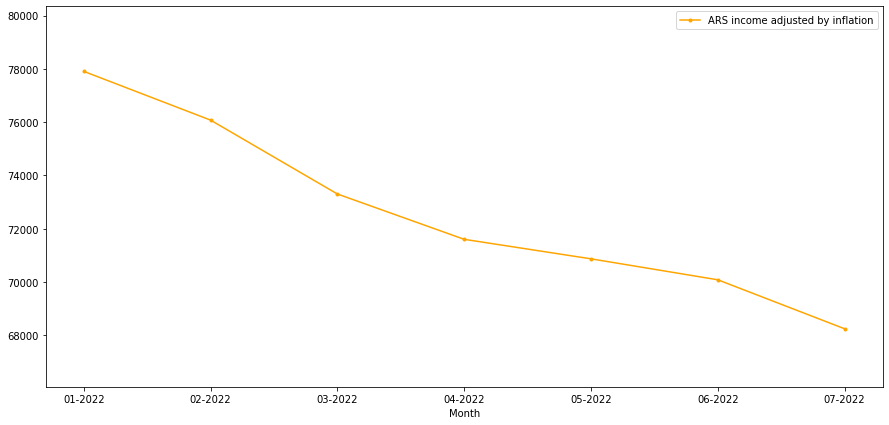

In [83]:
ax1 = data.rename(columns={'month_year': 'Month', 'income_ars_adj_inflation': 'ARS income adjusted by inflation'})\
         .plot(x = 'Month', y = 'ARS income adjusted by inflation', color = 'orange', figsize=(15,7), style='.-')
ylim = ax1.get_ylim()
ax1.set_ylim(ylim[0] * 0.975, ylim[1] * 1.025)

(335.037063331604, 469.4199910354614)

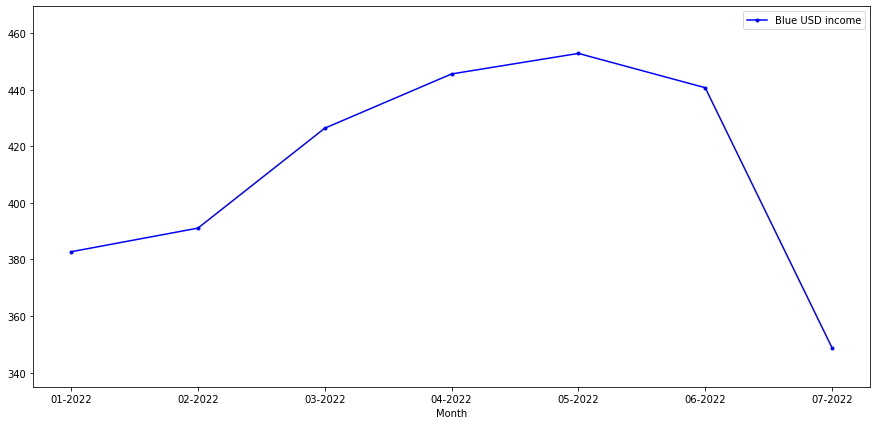

In [84]:
ax2 = data.rename(columns={'month_year': 'Month', 'income_blue_usd': 'Blue USD income'})\
    .plot(x='Month', y='Blue USD income', color='blue', figsize=(15,7), style='.-')
ylim = ax2.get_ylim()
ax2.set_ylim(ylim[0] * 0.975, ylim[1] * 1.025)

In [47]:
first_official_usd_buy_value = data.iloc[0].loc['buy']
first_inflation_rate = data.iloc[0].loc['cumm_inflation_factor']
first_usd_value = data.iloc[0].loc['blue_usd_avg_rate']

In [49]:
data['normalized_official_usd'] = data['buy'] / first_official_usd_buy_value
data['normalized_inflation'] = data['cumm_inflation_factor'] / first_inflation_rate
data['normalized_blue_usd'] = data['blue_usd_avg_rate'] / first_usd_value
data.head(10)

,month,year,buy,income,income_ars,inflation_factor,cumm_inflation_factor,blue_usd_avg_rate,month_year,income_blue_usd,income_ars_adj_inflation,normalized_official_usd,normalized_inflation,normalized_blue_usd
1-2022,1,2022,103.2500,784,80948.0,1.039062,1.039062,211.500,01-2022,382.732849,77904.843750,1.000000,1.000000,1.000000
2-2022,2,2022,105.5625,784,82761.0,1.046875,1.087891,211.625,02-2022,391.073822,76074.742188,1.022461,1.046875,1.000977
3-2022,3,2022,108.5625,784,85113.0,1.067383,1.161133,199.625,03-2022,426.364441,73301.695312,1.051758,1.117188,0.943848
4-2022,4,2022,112.3750,784,88102.0,1.059570,1.230469,197.750,04-2022,445.522125,71600.359375,1.087891,1.184570,0.935059
5-2022,5,2022,116.8750,784,91630.0,1.050781,1.292969,202.375,05-2022,452.773315,70867.914062,1.131836,1.244141,0.957031
6-2022,6,2022,121.6875,784,95403.0,1.052734,1.361328,216.500,06-2022,440.660522,70080.828125,1.178711,1.310547,1.023438
7-2022,7,2022,127.2500,784,99764.0,1.074219,1.461914,286.000,07-2022,348.825165,68242.039062,1.232422,1.407227,1.352539
8-2022,8,2022,130.2500,784,102116.0,NaN,NaN,NaN,08-2022,NaN,NaN,1.261719,NaN,NaN


(0.8886639404296875, 1.4666058349609374)

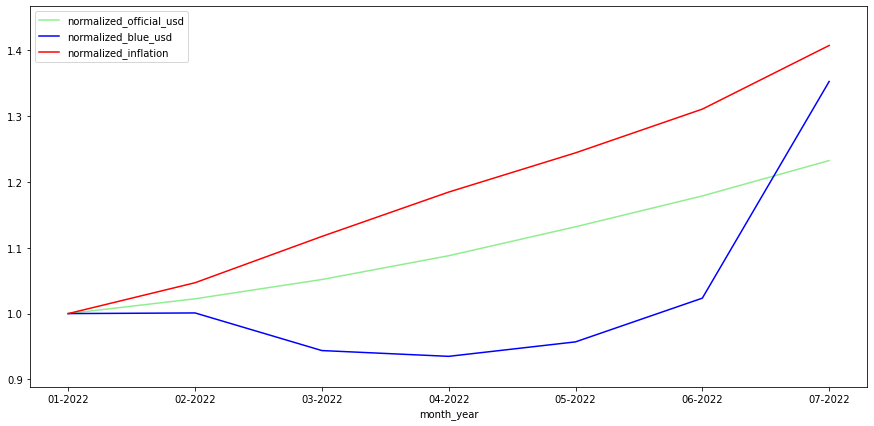

In [85]:
ax3 = data.dropna().plot(x='month_year', y='normalized_official_usd', color='lightgreen', figsize=(15,7))
data.dropna().plot(x='month_year', y='normalized_blue_usd', color='blue', ax=ax3)
data.dropna().plot(x='month_year', y='normalized_inflation', color='red', ax=ax3)
ylim = ax3.get_ylim()
ax3.set_ylim(ylim[0] * 0.975, ylim[1] * 1.025)

### Save plots.

In [86]:
ax1.get_figure().savefig('../out/inflation.png')

In [87]:
ax2.get_figure().savefig('../out/blue.png')

In [88]:
ax3.get_figure().savefig('../out/comparison.png')